# 10-701 Lecture 14: Linear Regression Examples


## Goals:
- Reviewing Lecture 13 concepts like OLS, Ridge Regression and Lasso


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

The diabetes dataset has a set of 10 variables: AGE SEX BMI BP S1 S2 S3 S4 S5 S6. We are loading it from sklearn (and this version is normalized) but you can find the original data and descrition on the LARS software package: https://web.stanford.edu/~hastie/Papers/LARS/


/Users/lwehbe/env/py3/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


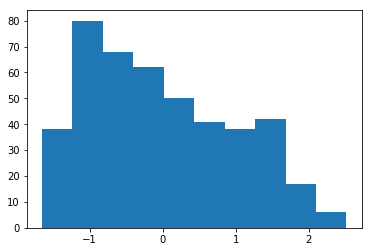

In [2]:
## Load dataset, features are AGE SEX BMI BP S1 S2 S3 S4 S5 S6, normalized 
X, y = datasets.load_diabetes(return_X_y=True)

from scipy.stats import zscore

# should we zscore X_train and X_test separately?
X = zscore(X)
y = zscore(y)

X_train = X[:300]
y_train = y[:300]

X_test = X[300:]
y_test = y[300:]

# read more here: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

plt.hist(y);

Questions to explore on your own:
- What happens if you have ill conditionned data?
- What happens if we don't normalize the variables? Should we add a bias term? What happens if the mean of y is not 0?  

### OLS:

Recall the OLS solution:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\newcommand{\x}{{\bf x}}
\newcommand{\y}{{\bf y}}
\newcommand{\X}{{\bf X}}
\newcommand{\Y}{{\bf Y}}
\widehat\beta  = \argminA_\beta \sum_i (y_i - \x_i^\top\beta )^2 = \argminA_\beta ||\y-\X\beta||_2^2 = \argminA_\beta (\y-\X\beta )^\top(\y-\X\beta )
$$

$$\hat\beta_{OLS} = (\X^\top\X)^{-1}\X^\top\y$$


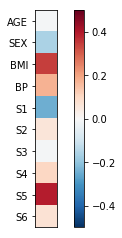

In [3]:
## implement OLS:
from numpy.linalg import inv

def beta_ols(X,y):
    return np.dot( inv(X.T.dot(X)) , np.dot(X.T, y) )


## Estimate
beta = beta_ols(X_train,y_train)

plt.imshow(beta.reshape((10,1)), cmap = 'RdBu_r', vmin = -0.5, vmax = 0.5)
plt.xticks([])
plt.yticks(np.arange(0,10),['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']);
plt.colorbar()

In [5]:
X_test[0].dot(beta)

0.9549735944972388

RSS = 66.90446417959618


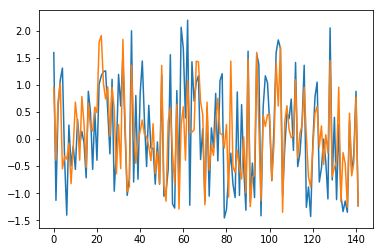

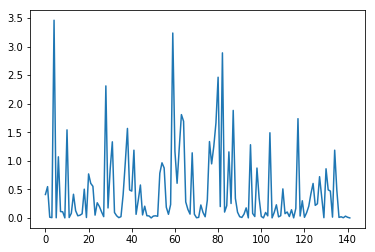

In [6]:
## Compute errors

y_pred = X_test.dot(beta)

plt.figure()
plt.plot(y_test)
plt.plot(y_pred)

plt.figure()
plt.plot((y_test-y_pred)**2)

print('RSS = {}'.format(np.sum((y_test - y_pred)**2)))

## Bias and variance

What happens when n is small? We do not have access to the true value of $\beta$ but we will look at the mean and variance of $\beta$ by resampling multiple times from our training set. We will compare the variance when n = 20 and when n = 40. 

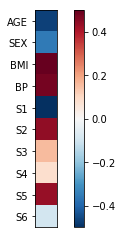

In [36]:
## VARIANCE and BIAS

n = X_train.shape[0]
ind = np.arange(n)
np.random.shuffle(ind)
ind = ind[:20]
beta_small_sample = beta_ols(X_train[ind],y_train[ind])

plt.imshow(beta_small_sample.reshape((10,1)), cmap = 'RdBu_r', vmin = -0.5, vmax = 0.5)
plt.xticks([])
plt.yticks(np.arange(0,10),['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']);
plt.colorbar()

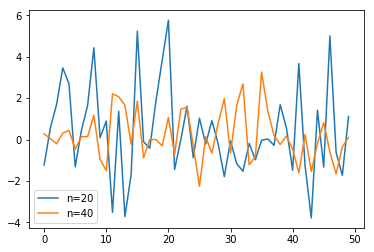

In [37]:
# let's look at $\beta_4$

b4_n20 = np.zeros((50))
b4_n40 = np.zeros((50))

for i in range(50):
    n = X_train.shape[0]
    ind = np.arange(n)
    np.random.shuffle(ind)
    ind = ind[:20]
    beta_small_sample = beta_ols(X_train[ind],y_train[ind])
    b4_n20[i] = beta_small_sample[4]
    
    
for i in range(50):
    n = X_train.shape[0]
    ind = np.arange(n)
    np.random.shuffle(ind)
    ind = ind[:40]
    beta_small_sample = beta_ols(X_train[ind],y_train[ind])
    b4_n40[i] = beta_small_sample[4]

    
plt.plot(b4_n20,label = 'n=20')
plt.plot(b4_n40,label = 'n=40')
plt.legend()

### Ridge:

Recall the Ridge solution:

$$
\hat\beta_{ridge} = \argminA_\beta = \argminA_\beta ||\y-\X\beta||_2^2  + \lambda_r ||\beta||_2^2
$$

$$\beta_{ridge} = (\X^\top\X + \lambda_r {\bf I}_p)^{-1}\X^\top\y.$$

How to pick $\lambda_r$?


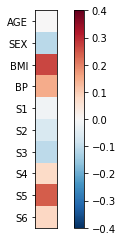

In [38]:
## implement OLS:
from numpy.linalg import inv

def beta_ridge(X,y,lmbda):
    p = X.shape[1]
    return np.dot( inv(X.T.dot(X) + lmbda*np.eye(p,p)) , np.dot(X.T, y) )


## Estimate

X_train = X[:300]
y_train = y[:300]

beta = beta_ridge(X_train,y_train,100)

plt.imshow(beta.reshape((10,1)), cmap = 'RdBu_r', vmin = -0.4, vmax = 0.4)
plt.xticks([])
plt.yticks(np.arange(0,10),['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']);
plt.colorbar()

RSS = 66.90446417959618


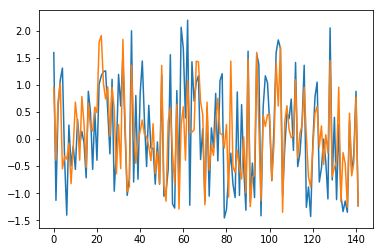

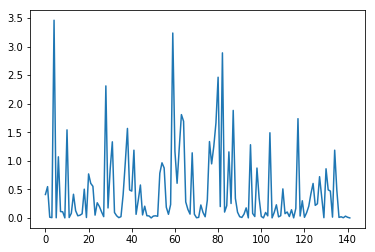

In [39]:
## Compute errors

beta = beta_ridge(X_train,y_train,0)
y_pred = X_test.dot(beta)

plt.figure()
plt.plot(y_test)
plt.plot(y_pred)

plt.figure()
plt.plot((y_test-y_pred)**2)

print('RSS = {}'.format(np.sum((y_test - y_pred)**2)))

RSS = 66.90486518360082


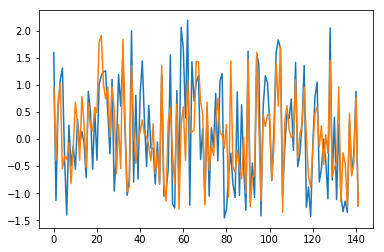

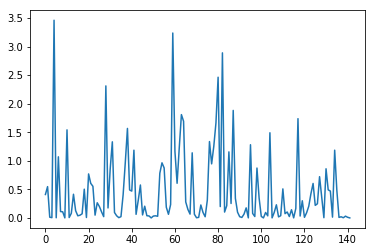

In [42]:
## Compute errors

beta = beta_ridge(X_train,y_train,0.001)
y_pred = X_test.dot(beta)

plt.figure()
plt.plot(y_test)
plt.plot(y_pred)

plt.figure()
plt.plot((y_test-y_pred)**2)

print('RSS = {}'.format(np.sum((y_test - y_pred)**2)))


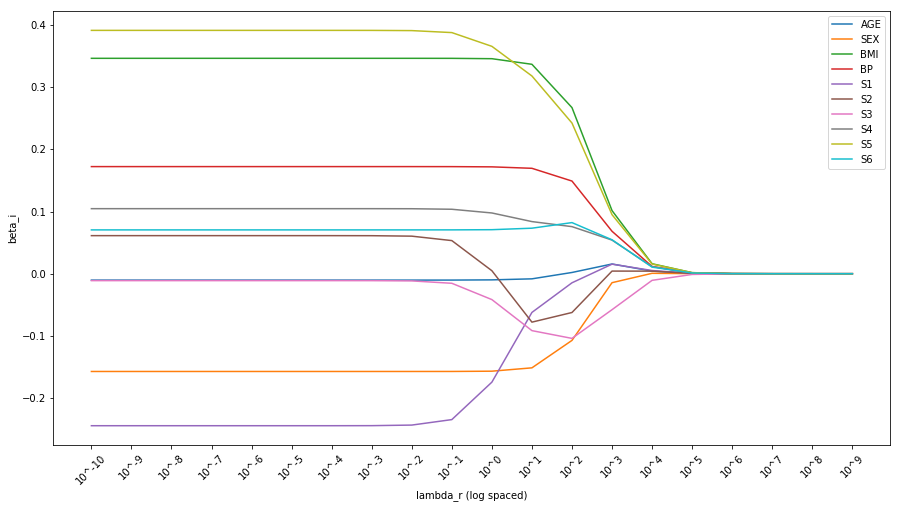

In [43]:
## Compute errors

lambdas = np.array([10**i for i in range(-10,10)])
nL = len(lambdas)
all_betas = np.zeros((10,nL))

for i_lambda, lmbda in enumerate(lambdas):
    all_betas[:,i_lambda] = beta_ridge(X_train,y_train,lmbda)
    
    
plt.figure(figsize=(15,8))
plt.plot(all_betas.T);
plt.xticks(np.arange(nL), ['10^{}'.format(i) for i in range(-10,10)],rotation=45)
plt.xlabel('lambda_r (log spaced)')
plt.ylabel('beta_i')
plt.legend(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']);


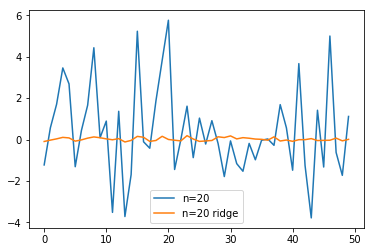

In [50]:
# let's look at $\beta_4$

b4_n20_ridge = np.zeros((50))

for i in range(50):
    n = X_train.shape[0]
    ind = np.arange(n)
    np.random.shuffle(ind)
    ind = ind[:20]
    beta_small_sample = beta_ridge(X_train[ind],y_train[ind],10)
    b4_n20_ridge[i] = beta_small_sample[4]
    
plt.plot(b4_n20,label = 'n=20')
plt.plot(b4_n20_ridge,label = 'n=20 ridge')
plt.legend()

## Which $\lambda_r$ to pick?

Use cross-validation on the training data!

Text(0, 0.5, 'error')

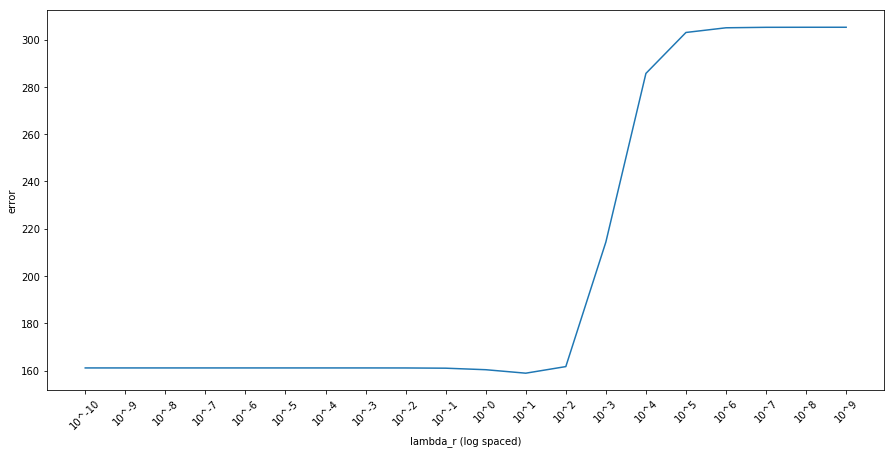

In [54]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False)

errors = np.zeros((nL))
           
for train_index, val_index in kf.split(X_train):
#     print("TRAIN:", train_index, "VAL:", val_index)
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    for i_lambda, lmbda in enumerate(lambdas):
        beta_tmp = beta_ridge(X_train_cv,y_train_cv,lmbda)
        errors[i_lambda] += np.sum((y_val_cv - np.dot(X_val_cv, beta_tmp))**2)

plt.figure(figsize=(15,7))
plt.plot(errors);
plt.xticks(np.arange(nL), ['10^{}'.format(i) for i in range(-10,10)],rotation=45)
plt.xlabel('lambda_r (log spaced)')
plt.ylabel('error')

optimal lambda is 10.0


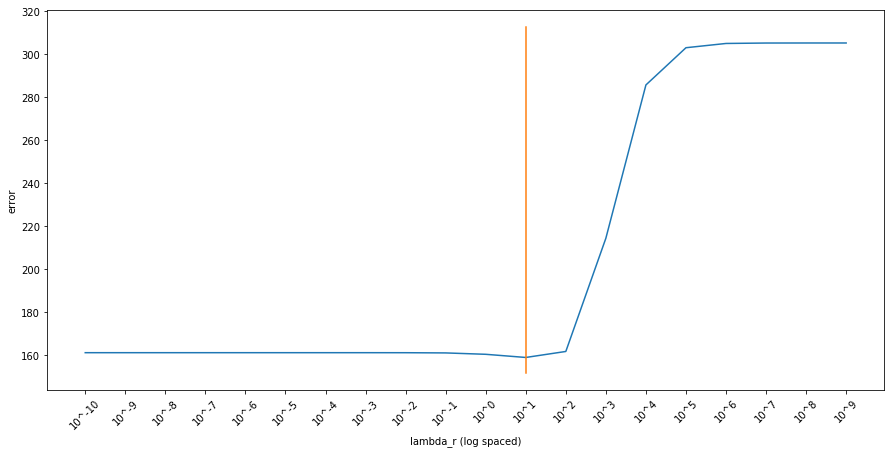

In [55]:
plt.figure(figsize=(15,7))
plt.plot(errors);
plt.xticks(np.arange(nL), ['10^{}'.format(i) for i in range(-10,10)],rotation=45)
plt.xlabel('lambda_r (log spaced)')
plt.ylabel('error')

lmbda_star_idx = np.argmin(errors)
lmbda_star = lambdas[lmbda_star_idx]

plt.plot([lmbda_star_idx,lmbda_star_idx],plt.ylim())

print('optimal lambda is {}'.format(lmbda_star))

In [58]:
# train model again using all training data

beta = beta_ridge(X_train,y_train,10)

y_test = y[300:]
y_pred = X_test.dot(beta)

print('RSS = {}'.format(np.sum((y_test - y_pred)**2)))


RSS = 67.32694020390295
